### Copyright 2021 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Linear and binary search with output of some statistics

In [1]:
# returns the index of key in a or False if not found
def linear_search(a, key):
    global comparison_keys, cond_check_loop, exec_loop
    for i in range(len(a)):
        cond_check_loop += 1
        exec_loop += 1
        comparison_keys += 1
        if key == a[i]:
            return i
    # this counts the last condition check
    cond_check_loop += 1
    return False

In [2]:
# returns the index of key in a or False if not found
def binary_search(a, key):
    global comparison_keys, exec_loop, cond_check_loop
    left = 0
    right = len(a)-1
    while (left <= right):
        cond_check_loop += 1
        exec_loop += 1
        mid = (left + right) // 2
        comparison_keys += 1
        if key == a[mid]:
            return mid
        elif key < a[mid]:
            right = mid - 1
        else:
            left = mid + 1
        # this counts "key < a[mid]"
        comparison_keys += 1
    # this counts the last condition check
    cond_check_loop += 1
    return False

## Global variables for easier information exchange between functions

In [3]:
comparison_keys = 0
cond_check_loop = 0
exec_loop = 0

## Imports

In [4]:
# use random for generating a subset of given size and random positions for key to be searched
import random

# use numpy for generating random permutation
import numpy

# initialialize random number generators to obtain reproducable results
# other values might be used or even no initialization done here
random.seed(1)
numpy.random.seed(1)

## Constants

In [5]:
# The size of array in tests can be changed here
ARRAY_SIZE = 100
NUM_SEARCHES = 100

## Generate test data and test algorithms

In [6]:
# test for search algorithms
random_array_all_keys = list(numpy.random.permutation(ARRAY_SIZE))

### Linear search

In [7]:
# linear search for all keys in arrays
# successful search of random element
sum_exec_loop = 0
for i in range(NUM_SEARCHES):
    exec_loop = 0
    linear_search(random_array_all_keys, random.randrange(ARRAY_SIZE))
    sum_exec_loop += exec_loop
print("Successful linear search (random keys): Average number of loop executions:", sum_exec_loop / NUM_SEARCHES)

Successful linear search (random keys): Average number of loop executions: 51.02


In [8]:
# linear search for all keys in arrays
# successful search of all keys
sum_exec_loop = 0
for i in range(NUM_SEARCHES):
    exec_loop = 0
    linear_search(random_array_all_keys, i)
    sum_exec_loop += exec_loop
print("Successful linear search (every key once): Average number of loop executions:", sum_exec_loop / NUM_SEARCHES)

Successful linear search (every key once): Average number of loop executions: 50.5


In [9]:
# linear unsuccessful search
sum_exec_loop = 0
for i in range(NUM_SEARCHES):
    exec_loop = 0
    linear_search(random_array_all_keys, ARRAY_SIZE)
    sum_exec_loop += exec_loop
print("Unsuccessful linear search: Average number of loop executions:", sum_exec_loop / NUM_SEARCHES)

Unsuccessful linear search: Average number of loop executions: 100.0


### Binary search

In [10]:
# for binary search the arrays have to be sorted
random_array_all_keys.sort()

In [11]:
# binary search for all keys in arrays
# successful search of random element
sum_exec_loop = 0
for i in range(NUM_SEARCHES):
    exec_loop = 0
    binary_search(random_array_all_keys, random.randrange(ARRAY_SIZE))
    sum_exec_loop += exec_loop
print("Successful binary search (random keys): Average number of loop executions:", sum_exec_loop / NUM_SEARCHES)

Successful binary search (random keys): Average number of loop executions: 5.91


In [12]:
# binary search for all keys in arrays
# unsuccessful search of random element
sum_exec_loop = 0
for i in range(NUM_SEARCHES):
    exec_loop = 0
    binary_search(random_array_all_keys, random.randrange(ARRAY_SIZE)+0.5) # this key does not exist
    sum_exec_loop += exec_loop
print("Successful binary search (random keys): Average number of loop executions:", sum_exec_loop / NUM_SEARCHES)

Successful binary search (random keys): Average number of loop executions: 6.75


In [13]:
# binary search for all keys in arrays
# successful search all keys
sum_exec_loop = 0
for i in range(NUM_SEARCHES):
    exec_loop = 0
    binary_search(random_array_all_keys, i)
    sum_exec_loop += exec_loop
print("Successful binary search (every key once): Average number of loop executions:", sum_exec_loop / NUM_SEARCHES)

Successful binary search (every key once): Average number of loop executions: 5.8


In [14]:
# binary search for all keys in arrays
# unsuccessful search all keys
sum_exec_loop = 0
for i in range(NUM_SEARCHES):
    exec_loop = 0
    binary_search(random_array_all_keys, i+0.5) # this key does not exist
    sum_exec_loop += exec_loop
print("Unsuccessful binary search (every key once): Average number of loop executions:", sum_exec_loop / NUM_SEARCHES)

Unsuccessful binary search (every key once): Average number of loop executions: 6.74


In [15]:
# for mixing successful and unsuccessful binary search it is necessary to have a defined range of keys
MIN_KEY = 0
MAX_KEY = 2*ARRAY_SIZE-1
random_array_sparse = random.sample(list(range(MIN_KEY, MAX_KEY+1)), ARRAY_SIZE)
# for binary search the arrays have to be sorted
random_array_sparse.sort()

In [16]:
# binary unsuccessful search
sum_exec_loop = 0
for i in range(NUM_SEARCHES):
    exec_loop = 0
    # search for key not present in the array
    key = random.randrange(MIN_KEY, MAX_KEY+1)
    while key in random_array_sparse:
        key = random.randrange(MIN_KEY, MAX_KEY+1)
    binary_search(random_array_sparse, key)
    sum_exec_loop += exec_loop
print("Unsuccessful binary search: Average number of loop executions:", sum_exec_loop / NUM_SEARCHES)

Unsuccessful binary search: Average number of loop executions: 6.73


In [17]:
# binary search (successful or unsuccessful depending on randomly chosen key)
sum_exec_loop = 0
sum_exec_loop_succ = 0
sum_exec_loop_unsucc = 0
num_succ = 0
num_unsucc = 0
for i in range(NUM_SEARCHES):
    exec_loop = 0
    # search for random key
    if binary_search(random_array_sparse, random.randrange(MIN_KEY, MAX_KEY+1)) != False:
        sum_exec_loop_succ += exec_loop
        num_succ += 1
    else:
        sum_exec_loop_unsucc += exec_loop
        num_unsucc += 1
    sum_exec_loop += exec_loop
print("Binary search: Average number of loop executions:", sum_exec_loop / NUM_SEARCHES)
print("Successful: Average number of loop executions:", sum_exec_loop_succ / num_succ)
print("Unsuccessful: Average number of loop executions:", sum_exec_loop_unsucc / num_unsucc)

Binary search: Average number of loop executions: 6.44
Successful: Average number of loop executions: 6.096153846153846
Unsuccessful: Average number of loop executions: 6.8125


## Graphical output of some statistics to gain better insight

In [18]:
# for visualization we make use of pyplot
import matplotlib.pyplot as plt
# used for calculation of y range
import math

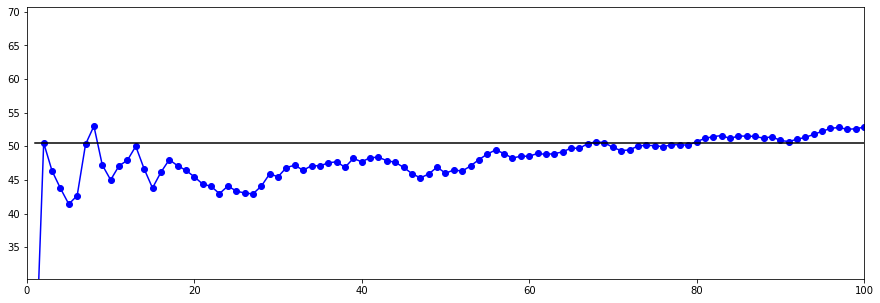

In [19]:
# linear search for all keys in array
# plot of convergence of increasing number of successful searches of random elements against theoretical average
sum_exec_loop = 0
average_up_to_current_search = []
for i in range(1, NUM_SEARCHES+1):
    exec_loop = 0
    linear_search(random_array_all_keys, random.randrange(ARRAY_SIZE))
    sum_exec_loop += exec_loop
    average_up_to_current_search.append(sum_exec_loop / i)
# create plot with ...
plt.figure(figsize=(15, 5))
plt.axis([0, NUM_SEARCHES, ((1+ARRAY_SIZE)/2)*0.6, ((1+ARRAY_SIZE)/2)*1.4])
# blue: average with search for an increasing number of random keys
plt.plot(list(range(1,NUM_SEARCHES+1)), average_up_to_current_search, "bo-")
# black: theoretical average
plt.plot(list(range(1,NUM_SEARCHES+1)), [(1+ARRAY_SIZE)/2]*NUM_SEARCHES, "k-")
plt.show()

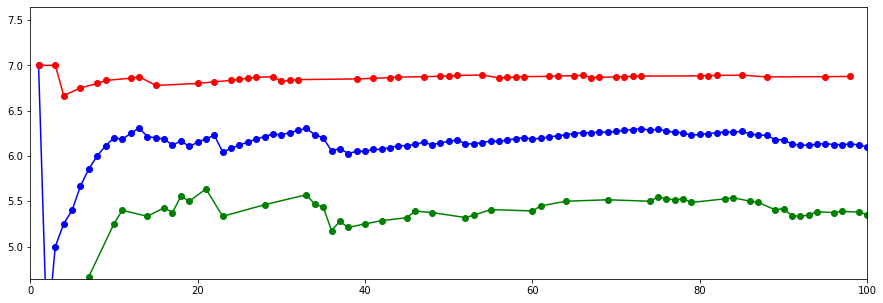

In [20]:
# binary search (successful or unsuccessful depending on randomly chosen key)
sum_exec_loop = 0
sum_exec_loop_succ = 0
sum_exec_loop_unsucc = 0
num_succ = 0
num_unsucc = 0
average_up_to_current_search = []
average_up_to_current_search_succ = []
average_up_to_current_search_unsucc = []
pos_succ_search = []
pos_unsucc_search = []
for i in range(1, NUM_SEARCHES+1):
    exec_loop = 0
    # search for random key
    if binary_search(random_array_sparse, random.randrange(MIN_KEY, MAX_KEY+1)) != False:
        sum_exec_loop_succ += exec_loop
        num_succ += 1
        average_up_to_current_search_succ.append(sum_exec_loop_succ / num_succ)
        pos_succ_search.append(i)
    else:
        sum_exec_loop_unsucc += exec_loop
        num_unsucc += 1
        average_up_to_current_search_unsucc.append(sum_exec_loop_unsucc / num_unsucc)
        pos_unsucc_search.append(i)
    sum_exec_loop += exec_loop
    average_up_to_current_search.append(sum_exec_loop / i)
# create plot with ...
plt.figure(figsize=(15, 5))
plt.axis([0, NUM_SEARCHES, math.log(ARRAY_SIZE,2)-2, math.log(ARRAY_SIZE,2)+1])
# blue: average with search for an increasing number of random keys
plt.plot(list(range(1,NUM_SEARCHES+1)), average_up_to_current_search, "bo-")
# green: successful search
plt.plot(pos_succ_search, average_up_to_current_search_succ, "go-")
# red: unsuccessful search
plt.plot(pos_unsucc_search, average_up_to_current_search_unsucc, "ro-")
plt.show()